# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,539,109,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
1,70,96,55,98,161,54,10,215,31,24,175,226,683,221,76,3,6,185,193
2,837,94,46,77,169,60,8,158,42,20,148,181,373,181,67,12,2,193,199
3,378,82,36,54,117,53,7,125,54,18,126,146,229,128,78,1,5,180,184
4,133,98,39,68,121,49,7,134,51,18,142,164,261,134,75,4,1,186,186
5,326,106,49,96,201,61,10,181,36,21,158,197,494,180,62,19,15,202,209
6,15,96,55,103,201,65,9,204,32,23,166,227,624,246,74,6,2,186,194
7,692,108,51,100,206,63,10,196,34,23,159,214,576,201,65,7,16,194,205
8,381,106,54,100,227,67,4,250,27,27,162,280,923,262,88,5,11,182,182
9,43,93,37,76,183,63,8,164,40,20,134,191,405,139,67,4,7,192,197


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,412.021858,93.925319,45.085610,82.595628,169.561020,61.551913,8.504554,170.180328,40.579235,20.693989,148.364299,189.744991,446.653916,176.10929,72.333333,6.409836,12.471767,188.954463,195.688525
std,242.783899,8.133684,6.169589,15.611632,32.730017,7.132706,4.093621,33.145255,7.738165,2.583846,14.478473,31.249009,176.702884,32.44989,7.316116,4.950998,8.845884,6.079741,7.356131
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,177.000000,181.000000
25%,199.000000,88.000000,40.000000,71.000000,143.000000,57.000000,6.000000,148.000000,33.000000,19.000000,137.000000,169.000000,322.000000,151.00000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,397.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,180.000000,369.000000,175.00000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,620.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,201.000000,45.000000,23.000000,160.000000,217.000000,601.000000,199.00000,75.000000,10.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,188.000000,320.000000,987.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [5]:
### YOUR CODE HERE
X_mean = data.mean(axis = 0)
X_std  = data.std(axis = 0)
X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std
X_train.mean(axis=0)

array([-0.0429047 ,  0.02999314,  0.03631206,  0.03216402,  0.01853744,
       -0.0180046 , -0.01366145,  0.04036332, -0.04541742,  0.04294237,
        0.02519329,  0.03568605,  0.03818245,  0.04322468, -0.01721895,
        0.00666623, -0.01428686,  0.00354504,  0.00755096])

In [6]:
y_train_pd = pd.DataFrame(y_train)
y_test_pd = pd.DataFrame(y_test)
y_train_pd[y_train_pd[0] == 'van'] = 0
y_train_pd[y_train_pd[0] == 'bus'] = 1
y_train_pd[y_train_pd[0] == 'saab'] = 2
y_train_pd[y_train_pd[0] == 'opel'] = 3

y_test_pd[y_test_pd[0] == 'van'] = 0
y_test_pd[y_test_pd[0] == 'bus'] = 1
y_test_pd[y_test_pd[0] == 'saab'] = 2
y_test_pd[y_test_pd[0] == 'opel'] = 3

y_train = y_train_pd.values.squeeze(1)
y_test = y_test_pd.values.squeeze(1)
y_train.shape

(549,)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [7]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

clf.fit(X_train, y_train)
print('default', clf.score(X_test, y_test))

param_grid = {'solver' :  ['newton-cg', 'sag', 'saga', 'lbfgs'], 'C' : np.linspace(0.01, 1, 10)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))

default 0.797979797979798


/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarni

{'C': 1.0, 'solver': 'newton-cg'}
0.797979797979798


test_accuracy:  0.797979797979798


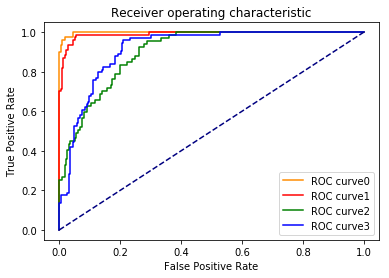

f1_score (4 classes):  [0.95061728 0.92105263 0.66666667 0.61764706]


In [8]:
best_linear_clf = LogisticRegression(C = grid_search.best_params_['C'],
                                solver = grid_search.best_params_['solver'],
                                multi_class = 'multinomial')
best_linear_clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
print("test_accuracy: ", best_linear_clf.score(X_test, y_test))

roc_ret = []
def show_roc_curve(best_clf, X_test, y_test):
    y_true = y_test
    y_pred = best_clf.predict_proba(X_test)

    for i in range(4):
        roc_ret.append(roc_curve(y_true, y_pred[:, i], pos_label = i))
        
    plt.figure()
    plt.plot(roc_ret[0][0], roc_ret[0][1], color='darkorange', label='ROC curve0')
    plt.plot(roc_ret[1][0], roc_ret[1][1], color='red', label='ROC curve1')
    plt.plot(roc_ret[2][0], roc_ret[2][1], color='green', label='ROC curve2')
    plt.plot(roc_ret[3][0], roc_ret[3][1], color='blue', label='ROC curve3')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    y_pred_classes = best_clf.predict(X_test)
    print("f1_score (4 classes): ", f1_score(y_true, y_pred_classes, average = None))

show_roc_curve(best_linear_clf, X_test, y_test)

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [9]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

ratios = []
for i in range(1, 20, 1):
    pca = PCA(n_components = i)
    pca.fit(X_train)
    ratios.append(pca.explained_variance_ratio_)
    ratios[i-1] = sum(ratios[i-1])
    
print(ratios)

[0.5072832418857692, 0.6684327808098296, 0.7470303834982456, 0.8136773006280948, 0.8671150811489737, 0.9155057359180118, 0.9449484911885273, 0.9637786442967354, 0.9757313998802837, 0.9847395965754218, 0.9895161853825206, 0.9927515442976438, 0.9950926415814912, 0.9969242754722429, 0.9981168912342098, 0.9989684798699551, 0.9996516223829203, 0.9999801188480858, 0.9999999999999999]


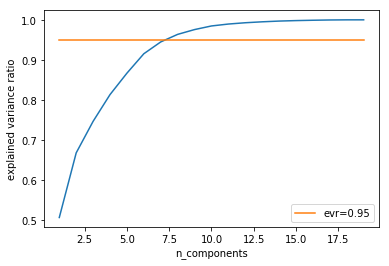

In [10]:
plt.figure()
plt.plot([i for i in range(1, 20, 1)], ratios)
plt.plot([i for i in range(1, 20, 1)], [0.95 for i in range(1, 20, 1)], label = 'evr=0.95')

plt.xlabel('n_components')
plt.ylabel('explained variance ratio')

plt.legend(loc="lower right")
plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [11]:
### YOUR CODE HERE
pca = PCA(n_components = 10)
print(X_train.shape)
X_train_norm = X_train
X_test_norm = X_test
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(549, 19)
(549, 10)
(297, 10)


#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [12]:
### YOUR CODE HERE
clf = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

clf.fit(X_train, y_train)
print('default', clf.score(X_test, y_test))

param_grid = {'solver' :  ['newton-cg', 'sag', 'saga', 'lbfgs'], 'C' : np.linspace(0.01, 1, 10)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))

default 0.7171717171717171


/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarni

{'C': 0.45, 'solver': 'newton-cg'}
0.7205387205387206


test_accuracy:  0.7205387205387206


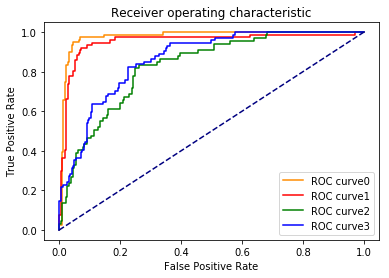

f1_score (4 classes):  [0.88622754 0.86075949 0.55714286 0.51162791]


In [13]:
best_clf = LogisticRegression(C = grid_search.best_params_['C'],
                                solver = grid_search.best_params_['solver'],
                                multi_class = 'multinomial')
best_clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve
print("test_accuracy: ", best_clf.score(X_test, y_test))

roc_ret = []

show_roc_curve(best_clf, X_test, y_test)


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [14]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
clf = DecisionTreeClassifier()

clf.fit(X_train_norm, y_train)
print('default', clf.score(X_test_norm, y_test))

param_grid = {'max_depth' : range(1, 200, 1)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train_norm, y_train)
print(grid_search.best_params_)
print(grid_search.score(X_test_norm, y_test))

default 0.7171717171717171


/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5}
0.67003367003367


test_accuracy:  0.6666666666666666


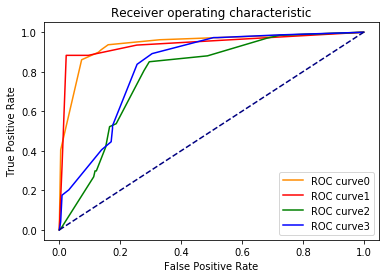

f1_score (4 classes):  [0.83435583 0.90666667 0.42647059 0.45517241]


In [15]:
best_tree_clf = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth'])
best_tree_clf.fit(X_train_norm, y_train)

from sklearn.metrics import roc_curve
print("test_accuracy: ", best_tree_clf.score(X_test_norm, y_test))

roc_ret = []

show_roc_curve(best_tree_clf, X_test_norm, y_test)


In [16]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
print('default', clf.score(X_test, y_test))

param_grid = {'max_depth' : range(1, 200, 1)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))

default 0.6262626262626263


/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 122}
0.6127946127946128


test_accuracy:  0.6296296296296297


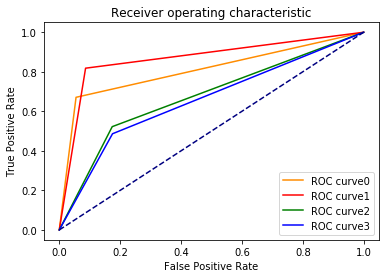

f1_score (4 classes):  [0.73611111 0.79245283 0.49295775 0.48322148]


In [17]:
best_clf = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth'])
best_clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve
print("test_accuracy: ", best_clf.score(X_test, y_test))

roc_ret = []

show_roc_curve(best_clf, X_test, y_test)

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [18]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
linear_clf_s = []
tree_clf_s = []
for i in range(2, 51, 2):
    linear_clf_s.append(BaggingClassifier(base_estimator = best_linear_clf, n_estimators = i))
    tree_clf_s.append(BaggingClassifier(base_estimator = best_tree_clf, n_estimators = i))

#linear
train_lin_scores = []
test_lin_scores = []
train_lin_f1_scores = []
test_lin_f1_scores = []
for clf in linear_clf_s:
    clf.fit(X_train_norm, y_train)
    train_lin_scores.append(clf.score(X_train_norm, y_train))
    test_lin_scores.append(clf.score(X_test_norm, y_test))
    
    train_lin_f1_scores.append(f1_score(y_train, clf.predict(X_train_norm), average = None))
    test_lin_f1_scores.append(f1_score(y_test, clf.predict(X_test_norm), average = None))
    
#tree
train_tree_scores = []
test_tree_scores = []
train_tree_f1_scores = []
test_tree_f1_scores = []
for clf in tree_clf_s:
    clf.fit(X_train_norm, y_train)
    train_tree_scores.append(clf.score(X_train_norm, y_train))
    test_tree_scores.append(clf.score(X_test_norm, y_test))
    
    train_tree_f1_scores.append(f1_score(y_train, clf.predict(X_train_norm), average = None))
    test_tree_f1_scores.append(f1_score(y_test, clf.predict(X_test_norm), average = None))

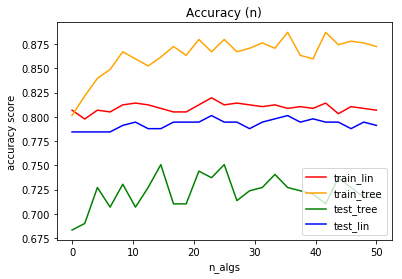

In [19]:
plt.figure()
plt.plot(np.linspace(0, 50, 25), train_lin_scores, color='red', label = 'train_lin')
plt.plot(np.linspace(0, 50, 25), train_tree_scores, color='orange', label = 'train_tree')
plt.plot(np.linspace(0, 50, 25), test_tree_scores, color='green', label = 'test_tree')
plt.plot(np.linspace(0, 50, 25), test_lin_scores, color='blue', label = 'test_lin')

plt.xlabel('n_algs')
plt.ylabel('accuracy score')
plt.title('Accuracy (n)')
plt.legend(loc="lower right")
plt.show()

25


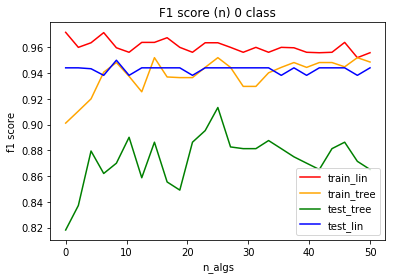

In [36]:
train_lin_f1_scores = np.array(train_lin_f1_scores)
test_lin_f1_scores = np.array(test_lin_f1_scores)
train_tree_f1_scores = np.array(train_tree_f1_scores)
test_tree_f1_scores = np.array(test_tree_f1_scores)

plt.figure()
print(len(train_lin_f1_scores))
plt.plot(np.linspace(0, 50, 25), train_lin_f1_scores[:, 0], color='red', label = 'train_lin')
plt.plot(np.linspace(0, 50, 25), train_tree_f1_scores[:, 0], color='orange', label = 'train_tree')
plt.plot(np.linspace(0, 50, 25), test_tree_f1_scores[:, 0], color='green', label = 'test_tree')
plt.plot(np.linspace(0, 50, 25), test_lin_f1_scores[:, 0], color='blue', label = 'test_lin')

plt.xlabel('n_algs')
plt.ylabel('f1 score')
plt.title('F1 score (n) 0 class')
plt.legend(loc="lower right")
plt.show()

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

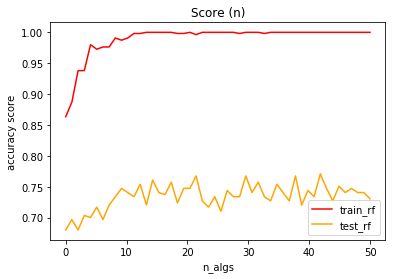

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_s = []
for i in range(1, 51):
    rf_clf_s.append(RandomForestClassifier(n_estimators = i))
    
train_rf_scores = []
test_rf_scores = []
train_rf_f1_scores = []
test_rf_f1_scores = []
for clf in rf_clf_s:
    clf.fit(X_train_norm, y_train)
    train_rf_scores.append(clf.score(X_train_norm, y_train))
    test_rf_scores.append(clf.score(X_test_norm, y_test))
    
    train_rf_f1_scores.append(f1_score(y_train, clf.predict(X_train_norm), average = None))
    test_rf_f1_scores.append(f1_score(y_test, clf.predict(X_test_norm), average = None))
    
plt.figure()
plt.plot(np.linspace(0, 50, 50), train_rf_scores, color='red', label = 'train_rf')
plt.plot(np.linspace(0, 50, 50), test_rf_scores, color='orange', label = 'test_rf')

plt.xlabel('n_algs')
plt.ylabel('accuracy score')
plt.title('Score (n)')
plt.legend(loc="lower right")
plt.show()

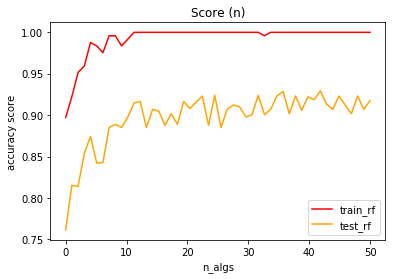

In [40]:
train_rf_f1_scores = np.array(train_rf_f1_scores)
test_rf_f1_scores = np.array(test_rf_f1_scores)

plt.figure()
plt.plot(np.linspace(0, 50, 50), train_rf_f1_scores[:, 0], color='red', label = 'train_rf')
plt.plot(np.linspace(0, 50, 50), test_rf_f1_scores[:, 0], color='orange', label = 'test_rf')

plt.xlabel('n_algs')
plt.ylabel('accuracy score')
plt.title('Score (n)')
plt.legend(loc="lower right")
plt.show()

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [22]:
# YOUR CODE HERE

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.